In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
cv2.__version__    # 4.1.2

'4.9.0'

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

이미지를 성공적으로 읽었습니다.


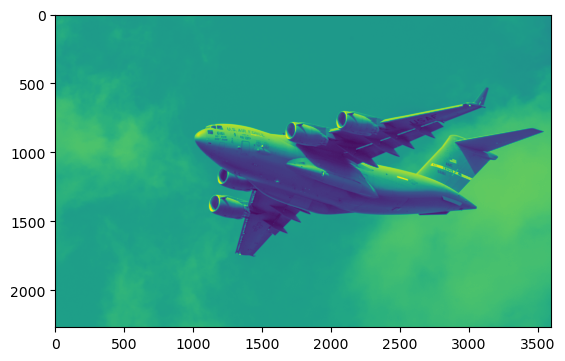

In [6]:
# 이미지 읽기
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지가 제대로 읽어졌는지 확인
if image is not None:
    print("이미지를 성공적으로 읽었습니다.")
else:
    print("이미지를 읽는데 문제가 발생했습니다.")

# 이미지 표시
plt.imshow(image)
plt.show()

In [8]:
image.dtype   # numpy.ndarray
image.shape  # (2270, 3600)

(2270, 3600)

In [9]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

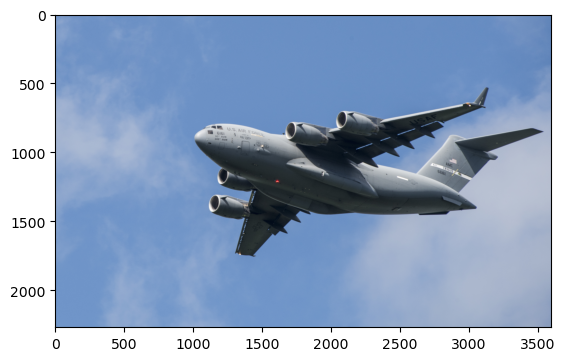

In [13]:
# 컬러 이미지 로드
image_bgr = cv2.imread('plane.jpg', cv2.IMREAD_COLOR)

# RGB타입으로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# plot
plt.imshow(image_rgb); plt.show()

In [18]:
import cv2
# 이미지 로드 
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)

In [19]:
# 이미지 저장 
cv2.imwrite('new_plane.jpg', image)

True

In [20]:
image = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [21]:
# 이미지 크기를 50x50으로 변경
image_50x50 = cv2.resize(image, (50, 50))

Text(0.5, 1.0, 'Resized Image')

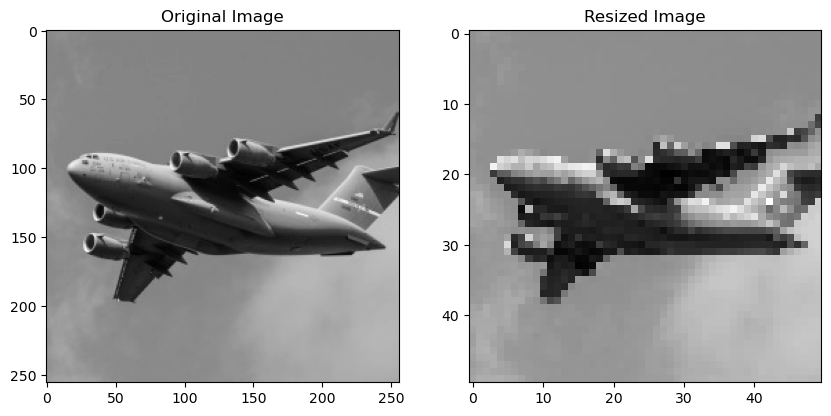

In [25]:
# 출력 
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resized Image')

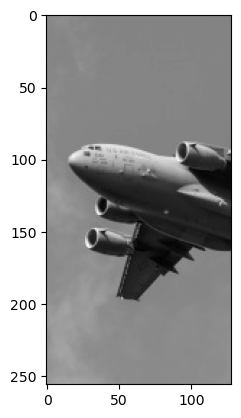

In [26]:
image = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지의 모든 행과 열의 절반만 선택
image_cropped = image[:,:128]

plt.imshow(image_cropped, cmap='gray')
plt.show()

In [27]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

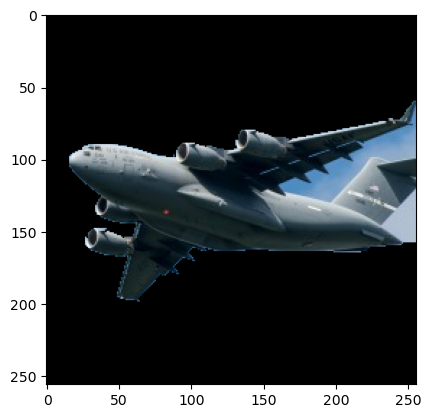

In [42]:
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 56, 256, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           100,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()